<a href="https://colab.research.google.com/github/babybulat/ml-in-aesc-trial/blob/main/task2_linreg_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')


df['plans_university'] = df['plans_universitypast_failures'].apply(lambda x: 1 if x > 0 else -1)
df['past_failures'] = df['plans_universitypast_failures'].apply(lambda x: abs(x) % 10)

df = df.drop('plans_universitypast_failures', axis=1)

df.to_csv('data1.csv', index=False)


### Задача 2: пропуски в данных
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [2]:
import pandas as pd

df = pd.read_csv('data1.csv')

df = df.fillna(df.mean())

df.to_csv('data2.csv', index=False)

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv('data2.csv')

numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
                  'goout', 'Dalc', 'Walc', 'health', 'past_failures']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df_normalized.to_csv('data3.csv', index=False)


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

df_features = pd.read_csv('data3.csv')

scores = pd.read_csv('scores.csv', header=None)[0]





X = df_features
y = scores

model = LinearRegression()

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

cv_scores_r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
cv_scores_mse = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_scores_mae = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')

print("РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ:")
print("-" * 50)

for i in range(4):
    print(f"Разбиение {i+1}:")
    print(f"  R² (коэффициент детерминации) = {cv_scores_r2[i]:.4f}")
    print(f"  MSE (среднеквадратичная ошибка) = {-cv_scores_mse[i]:.4f}")
    print(f"  RMSE (корень из MSE) = {np.sqrt(-cv_scores_mse[i]):.4f}")
    print(f"  MAE (средняя абсолютная ошибка) = {-cv_scores_mae[i]:.4f}")
    print("-" * 35)


РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ:
--------------------------------------------------
Разбиение 1:
  R² (коэффициент детерминации) = 0.1751
  MSE (среднеквадратичная ошибка) = 261.8482
  RMSE (корень из MSE) = 16.1817
  MAE (средняя абсолютная ошибка) = 11.6456
-----------------------------------
Разбиение 2:
  R² (коэффициент детерминации) = 0.3115
  MSE (среднеквадратичная ошибка) = 237.8080
  RMSE (корень из MSE) = 15.4210
  MAE (средняя абсолютная ошибка) = 11.3518
-----------------------------------
Разбиение 3:
  R² (коэффициент детерминации) = 0.2432
  MSE (среднеквадратичная ошибка) = 171.8815
  RMSE (корень из MSE) = 13.1104
  MAE (средняя абсолютная ошибка) = 9.2494
-----------------------------------
Разбиение 4:
  R² (коэффициент детерминации) = 0.0806
  MSE (среднеквадратичная ошибка) = 230.7029
  RMSE (корень из MSE) = 15.1889
  MAE (средняя абсолютная ошибка) = 10.6803
-----------------------------------


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('data3.csv')
df2 = pd.read_csv('data2.csv')

attendance = pd.read_csv('attendance.csv', sep=";")
attendance = attendance.replace({"+": 1}).fillna(0)
positions = pd.read_csv('school_support.txt', names = ["pos"])
df["support"] = 0
df2["support"]=0
df.loc[positions["pos"]-1, "support"] = 1
df2.loc[positions["pos"]-1, "support"] = 1

attendance["sum"] = attendance.sum(axis=1)
df["attendance"] = attendance["sum"]
df2["attendance"] = attendance["sum"]
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
                  'goout', 'Dalc', 'Walc', 'health', 'past_failures', 'support', 'attendance']
scaler = MinMaxScaler()
df_normalized = df.copy()
df2.to_csv('datanotnorm.csv',index=False)
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df_normalized.to_csv('data4.csv', index=False)


/tmp/ipython-input-3647043471.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  attendance = attendance.replace({"+": 1}).fillna(0)


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

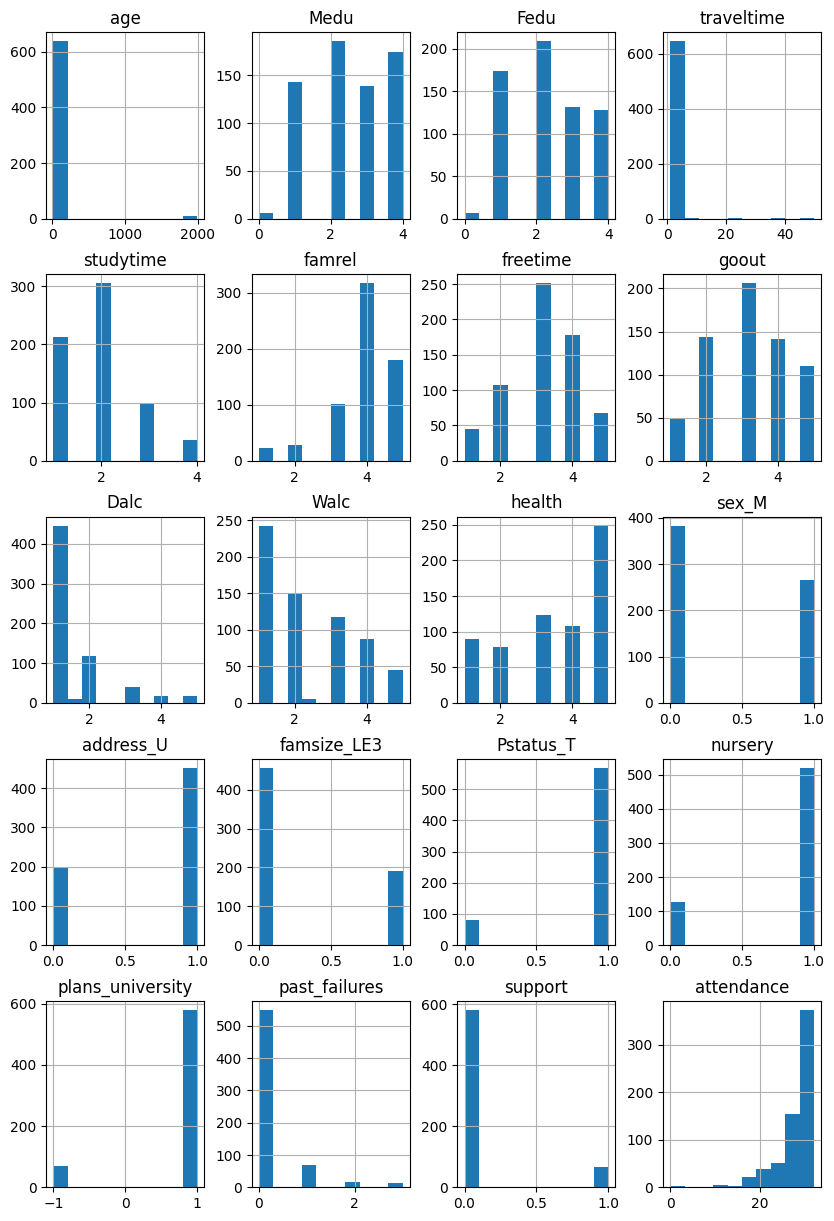

In [13]:
import pandas as pd
df = pd.read_csv('datanotnorm.csv')
df.hist(figsize=(10,15))


df.loc[df['age'] > 1000, 'age'] = 2006 - df.loc[df['age'] > 1000, 'age']

def recode_traveltime(value):
    if value < 15:
        return 1
    elif 15 <= value < 30:
        return 2
    elif 30 <= value <= 60:
        return 3
    elif value > 60:
        return 4
    else:
        return value

df['traveltime'] = df['traveltime'].apply(recode_traveltime)

numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
                  'goout', 'Dalc', 'Walc', 'health', 'past_failures', 'support', 'attendance']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df_normalized.to_csv('datanorm_cleaned.csv', index=False)

df.to_csv('datanotnorm_cleaned.csv', index=False)

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [14]:
import sklearn
from sklearn import linear_model
df = pd.read_csv('datanorm_cleaned.csv')
regression = linear_model.LinearRegression().fit(df, scores) #create model and train it
prediction = regression.predict(df)
error = (prediction - scores)**2 #simple error - square error

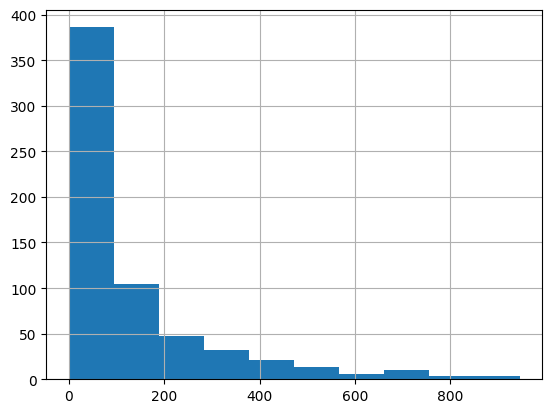

In [30]:
error.hist()
indexes = error.nlargest(50).index
df_clean = df.drop(index=indexes)
scores_clean = scores.drop(index=indexes)


### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных.

In [31]:
X = df_clean
y = scores_clean

model = LinearRegression()

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

cv_scores_r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
cv_scores_mse = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
cv_scores_mae = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')

print("РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ:")
print("-" * 50)

for i in range(4):
    print(f"Разбиение {i+1}:")
    print(f"  R² (коэффициент детерминации) = {cv_scores_r2[i]:.4f}")
    print(f"  MSE (среднеквадратичная ошибка) = {-cv_scores_mse[i]:.4f}")
    print(f"  RMSE (корень из MSE) = {np.sqrt(-cv_scores_mse[i]):.4f}")
    print(f"  MAE (средняя абсолютная ошибка) = {-cv_scores_mae[i]:.4f}")
    print("-" * 35)

РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ:
--------------------------------------------------
Разбиение 1:
  R² (коэффициент детерминации) = 0.3432
  MSE (среднеквадратичная ошибка) = 141.3478
  RMSE (корень из MSE) = 11.8890
  MAE (средняя абсолютная ошибка) = 8.2964
-----------------------------------
Разбиение 2:
  R² (коэффициент детерминации) = 0.2695
  MSE (среднеквадратичная ошибка) = 168.9366
  RMSE (корень из MSE) = 12.9976
  MAE (средняя абсолютная ошибка) = 9.3593
-----------------------------------
Разбиение 3:
  R² (коэффициент детерминации) = 0.1845
  MSE (среднеквадратичная ошибка) = 241.6514
  RMSE (корень из MSE) = 15.5451
  MAE (средняя абсолютная ошибка) = 10.9892
-----------------------------------
Разбиение 4:
  R² (коэффициент детерминации) = 0.2909
  MSE (среднеквадратичная ошибка) = 184.6823
  RMSE (корень из MSE) = 13.5898
  MAE (средняя абсолютная ошибка) = 9.4222
-----------------------------------


**Отчёт**

При построение линейной регрессии на ненормализованных данных и нормализованных данных результат не меняется.

Но MSE уменьшается , если мы очистим данные и уберем из них те , которые дают высокую ошибку.